# Machine Learning 2022
## Lab. 10 - Ensemble methods
### Imię i nazwisko: Kacper Moździerz
### Nr albumu: 401733
### Data: 24.05.2022

### Grupa: wtorek 9:30 - 11:00

#### 1.Imports of libs

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#### 2. Decision Tree Classifier

In [13]:
dataset = load_wine()

clf = DecisionTreeClassifier(random_state=1, min_samples_leaf=3)

DTC_cv = cross_val_score(clf, dataset.data, dataset.target)

print(f"DTC scores: {DTC_cv}, avg_ratio = {DTC_cv.mean()}")


DTC scores: [0.94444444 0.80555556 0.80555556 0.91428571 0.97142857], avg_ratio = 0.8882539682539681


#### 3. Bagging Classifier

In [14]:
from sklearn.ensemble import BaggingClassifier

clf2 = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=3),n_estimators=50,random_state=1)

BaggingClassifier_cv = cross_val_score(clf2, dataset.data, dataset.target)

print(f"BaggingClassifier scores: {BaggingClassifier_cv}, avg_ratio = {BaggingClassifier_cv.mean()}")

BaggingClassifier scores: [0.91666667 0.91666667 0.94444444 0.97142857 1.        ], avg_ratio = 0.9498412698412698


#### 4. AdaBoost Classifier

In [15]:
from sklearn.ensemble import AdaBoostClassifier

clf3 = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=3,max_depth = 1), 
                            n_estimators=50, random_state=1, algorithm='SAMME')
AdaBoostClassifier_cv = cross_val_score(clf3, dataset.data, dataset.target)

print(f"AdaBoostClassifier scores: {AdaBoostClassifier_cv}, avg_ratio = {AdaBoostClassifier_cv.mean()}")

AdaBoostClassifier scores: [0.83333333 0.91666667 0.91666667 1.         1.        ], avg_ratio = 0.9333333333333332


#### 5. GradientBoosting Classifier

In [20]:
from sklearn.ensemble import GradientBoostingClassifier

clf3 = GradientBoostingClassifier(n_estimators=50, max_depth = 1, random_state=1,min_samples_leaf=3,
                                    learning_rate=1.0, subsample=0.5)
GradientBoostingClassifier_cv = cross_val_score(clf3, dataset.data, dataset.target)

print(f"GradientBoostingClassifier scores: {GradientBoostingClassifier_cv}, avg_ratio = {GradientBoostingClassifier_cv.mean()}")


GradientBoostingClassifier scores: [0.91666667 0.97222222 0.97222222 0.42857143 0.97142857], avg_ratio = 0.8522222222222222


#### 6. OBB loss plot

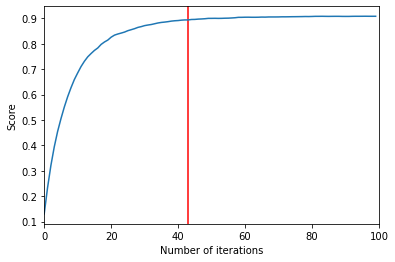

In [46]:
import matplotlib.pyplot as plt
import numpy as np
GBclf = GradientBoostingClassifier(n_estimators=100, random_state=30,
                                 learning_rate=0.1, subsample=0.5, max_depth=1)

GBclf.fit(dataset.data, dataset.target)
GB_oob = GBclf.oob_improvement_
idx = np.where(GB_oob < 1e-5)[0][0]

plt.figure()
plt.axvline(x=idx, color='r')
plt.plot(range(100), np.cumsum(GB_oob))

plt.xlabel("Number of iterations")
plt.ylabel("Score")
plt.xlim([0, 100])
plt.show()